In [3]:
import pandas as pd

file_path = 'train.csv'
data = pd.read_csv(file_path)

data.head()


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


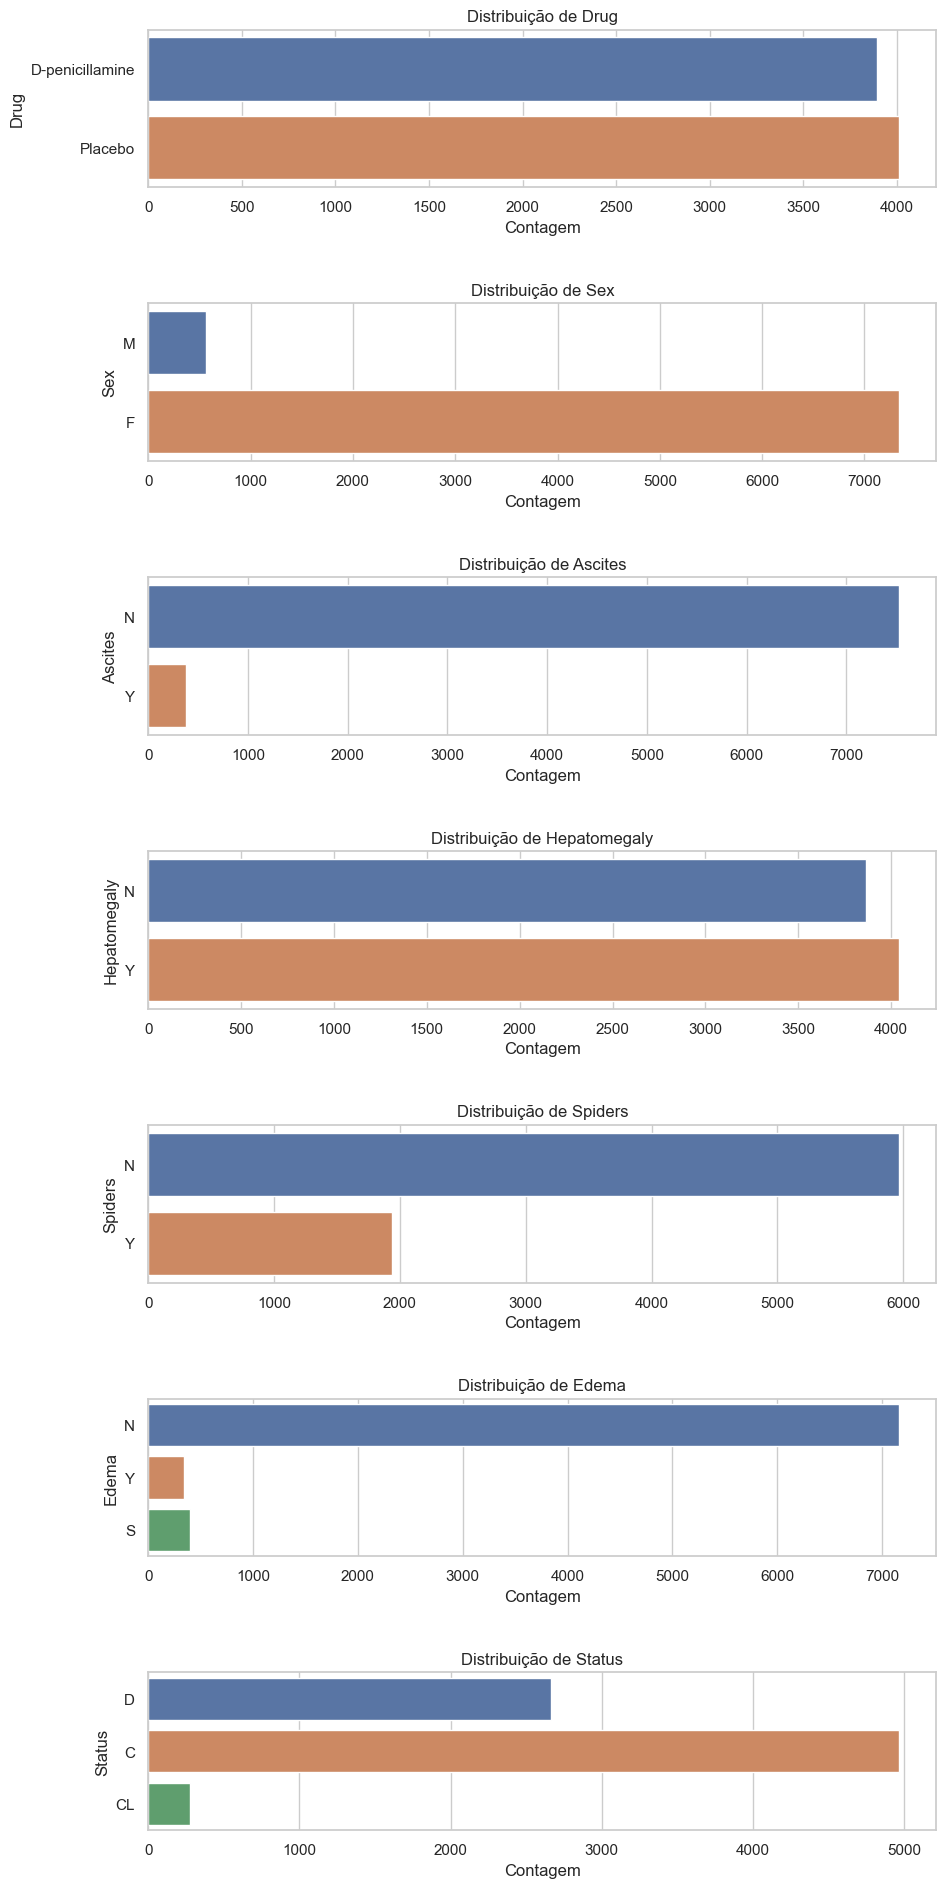

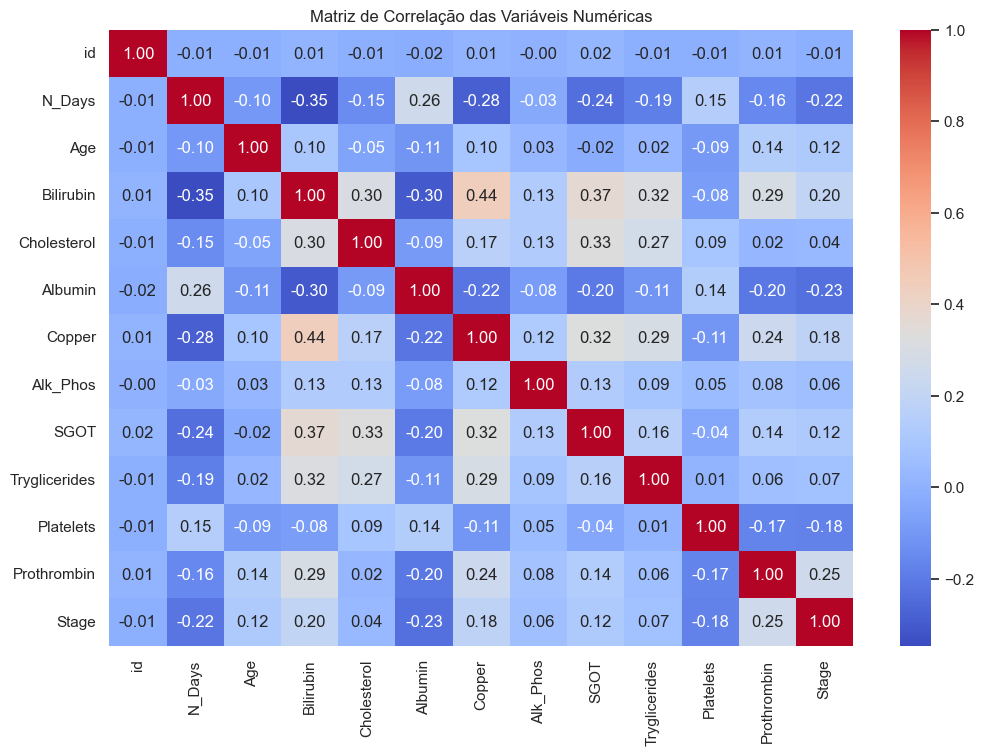

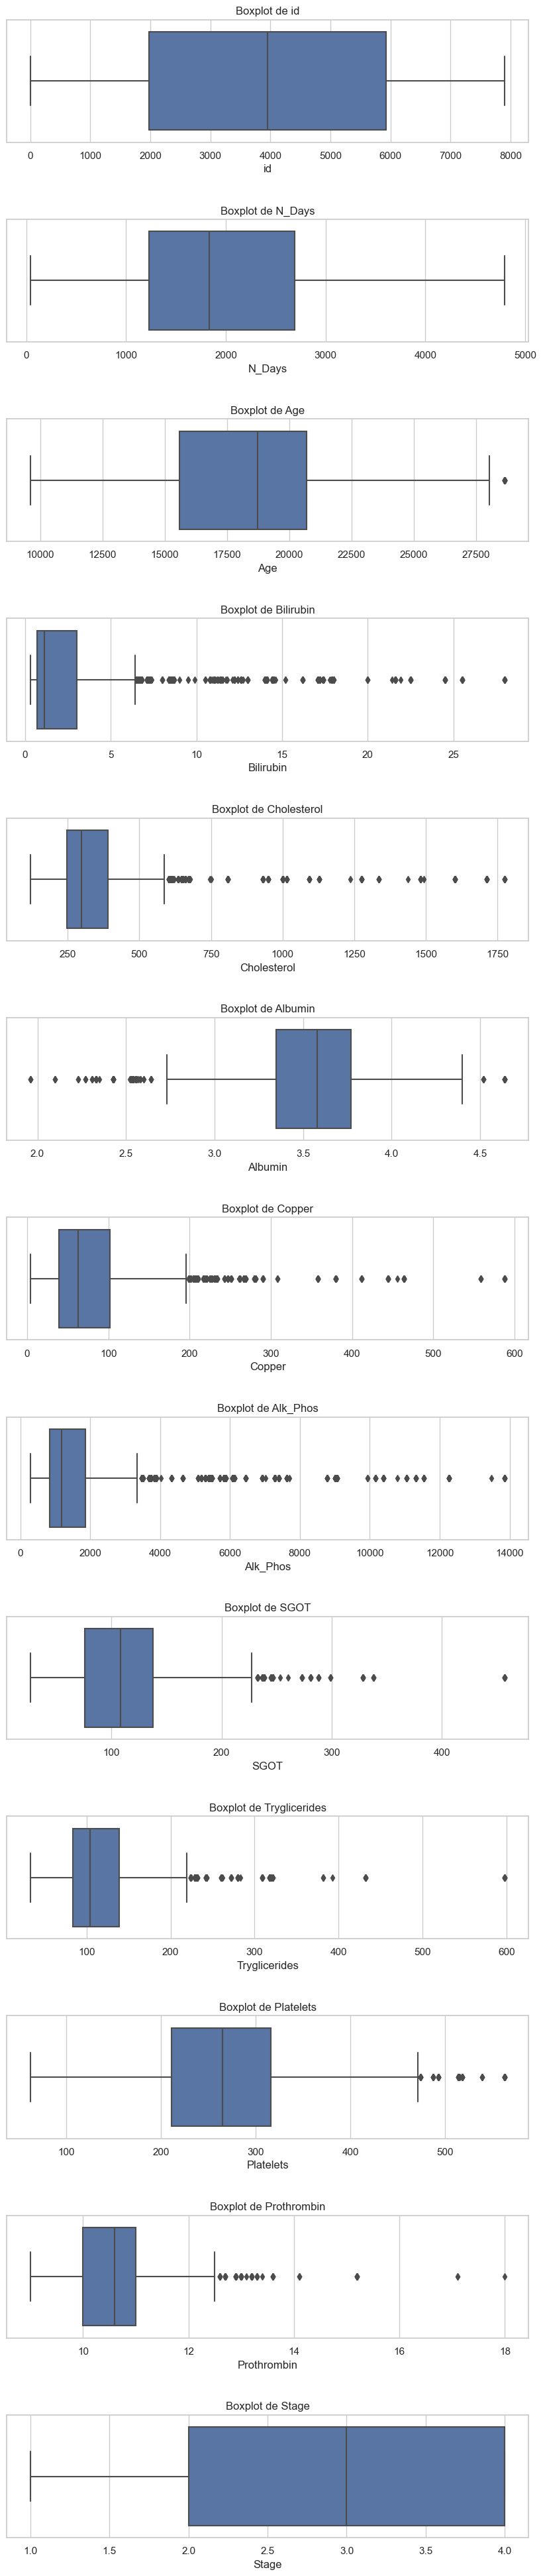

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel('Contagem')
    axes[i].set_ylabel(col)

plt.show()

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 40))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = data.drop(['Stage', 'id'], axis=1)
y = data['Stage']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

         1.0       0.25      0.01      0.02        91
         2.0       0.30      0.16      0.21       305
         3.0       0.53      0.63      0.58       662
         4.0       0.63      0.75      0.69       523

    accuracy                           0.55      1581
   macro avg       0.43      0.39      0.37      1581
weighted avg       0.50      0.55      0.51      1581

